In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from detection_util import create_train_val_set
import json
from collections import defaultdict

###  **The IoU overlap** threshold for pedestrian, cyclist, tricycle is set to 0.5 and for car, truck, tram is set to 0.7.


In [4]:
root = "../data/SSLAD-2D/labeled/"
train_sets, val_sets = create_train_val_set(root, avalanche=False)

categories = {
    1: "Pedestrain",
    2: "Cyclist",
    3: "Car",
    4: "Truck",
    5: "Tram (Bus)",
    6: "Tricycle"
}

In [14]:
a = [len(train_sets[i]) for i in range(4) ]
b = [len(val_sets[i]) for i in range(4) ]
print (a,b,"train:",sum(a),"val:",sum(b),"total:",sum(a)+sum(b))

[4470, 1329, 1479, 524] [497, 148, 165, 59] train: 7802 val: 869 total: 8671


In [158]:
vs = val_sets[0]
print("ids",vs.samples)


ids [4501, 4502, 4503, 4504, 4505, 4506, 4507, 4508, 4509, 4510, 4511, 4512, 4513, 4514, 4515, 4516, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4525, 4526, 4527, 4528, 4529, 4530, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4540, 4541, 4542, 4544, 4545, 4546, 4547, 4548, 4549, 4550, 4551, 4552, 4553, 4554, 4555, 4556, 4557, 4558, 4559, 4560, 4561, 4562, 4563, 4564, 4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4583, 4584, 4585, 4586, 4587, 4588, 4589, 4590, 4591, 4592, 4593, 4594, 4595, 4596, 4597, 4598, 4599, 4600, 4601, 4602, 4603, 4604, 4605, 4606, 4607, 4608, 4609, 4610, 4611, 4612, 4613, 4614, 4615, 4616, 4617, 4618, 4619, 4620, 4621, 4622, 4623, 4624, 4625, 4626, 4627, 4628, 4629, 4630, 4631, 4632, 4633, 4634, 4635, 4636, 4637, 4638, 4639, 4640, 4641, 4642, 4643, 4644, 4645, 4646, 4648, 4649, 4650, 4651, 4652, 4653, 4654, 4655, 4656, 4657, 4658, 4659, 4660, 4661, 4662, 4663, 4664, 4665, 4666, 4667, 4668,

In [182]:
from tqdm import tqdm
label_stats = defaultdict(int)
aspect_stats = defaultdict(list)
width_stats  =defaultdict(list)
height_stats = defaultdict(list)
for ts in train_sets:
    L = len(ts)
    for i in tqdm(range(L)):
        target = ts._load_target(i)
        for idx, b in enumerate(target['labels'].tolist()):
            label_stats[b] +=1
            x, y, w, h = target['boxes'][idx].tolist()
            ratio = w / h
            aspect_stats[b].append(ratio)
            width_stats[b].append(w)
            height_stats[b].append(h)
                   

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 524/524 [00:01<00:00, 294.26it/s]


In [169]:
for k in label_stats:
    print(categories[k] , label_stats[k])

Car 34433
Cyclist 6689
Truck 11286
Tram (Bus) 2319
Pedestrain 5139
Tricycle 212


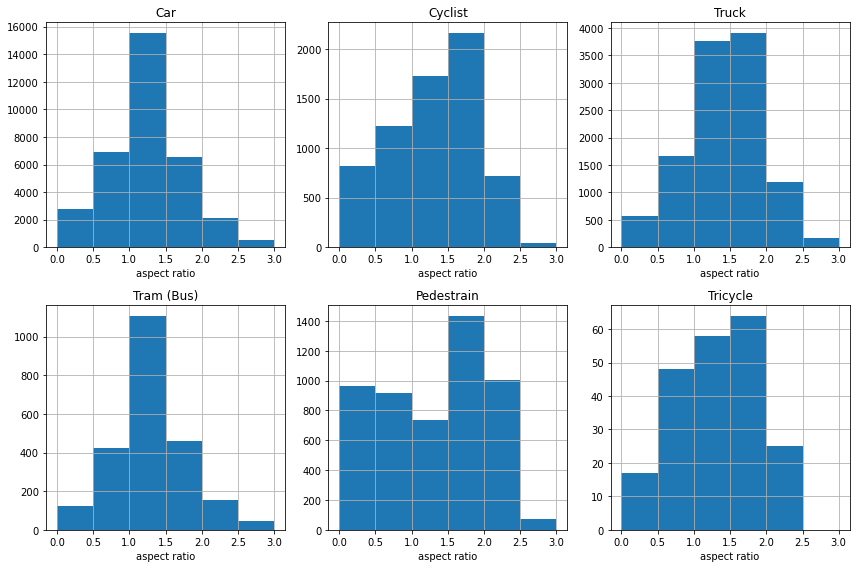

In [183]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for idx, ax in zip(aspect_stats.keys(), axes.flatten()):
    ax.hist(aspect_stats[idx],bins=[0,0.5,1,1.5,2,2.5,3])
    ax.grid(True)
    ax.set_xlabel("aspect ratio")
    ax.set_title(categories[idx])
plt.tight_layout()
plt.show()

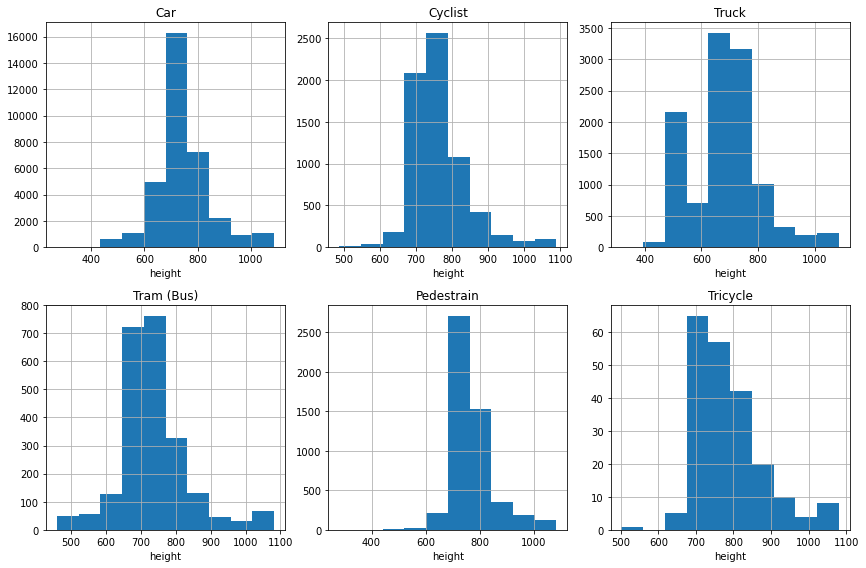

In [187]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for idx, ax in zip(aspect_stats.keys(), axes.flatten()):
    ax.hist(height_stats[idx],bins=10)
    ax.grid(True)
    ax.set_xlabel("height")
    ax.set_title(categories[idx])
plt.tight_layout()
plt.show()

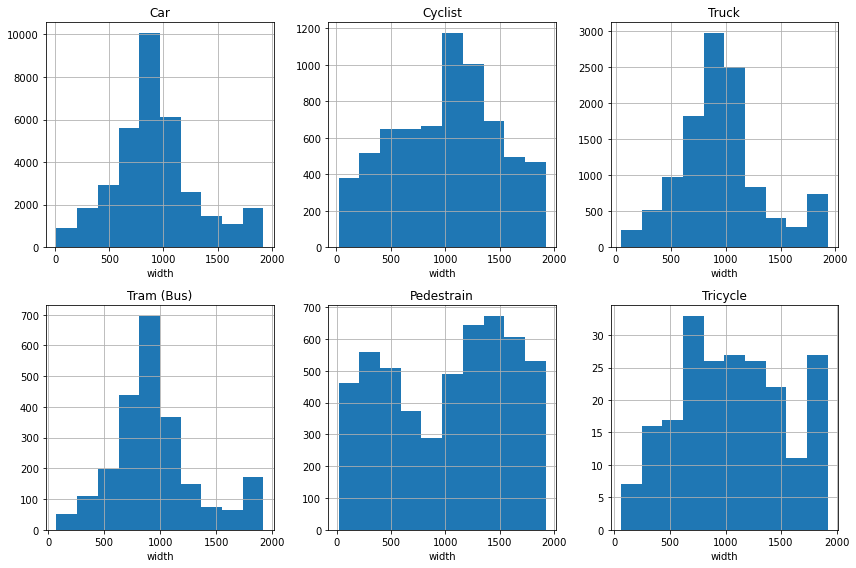

In [188]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
for idx, ax in zip(aspect_stats.keys(), axes.flatten()):
    ax.hist(width_stats[idx],bins=10)
    ax.grid(True)
    ax.set_xlabel("width")
    ax.set_title(categories[idx])
plt.tight_layout()
plt.show()

In [16]:
def visualize_image(idx, dataset, ax):
    img, target = dataset[idx]
    img = img.detach().numpy()
    img = np.moveaxis(img, 0, 2)
    ax.imshow(img)
    ax.axis('off')

    for bbox in target['boxes']:
        ax.add_patch(Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1],
                               fill=False, lw=2, edgecolor='r'))

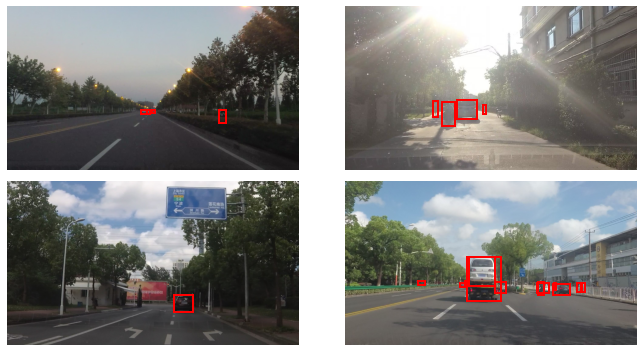

In [201]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
N = len(axes.flatten())
dataset = train_sets[0]
idxs = np.random.randint(0, len(dataset), N)
for idx, ax in zip(idxs, axes.flatten()):
    visualize_image(idx, dataset, ax)
plt.tight_layout()
plt.show()

In [30]:
def read_json(file):
    with open(file) as f:
        return json.load(f)

## boxes are in x, y, w,h from fast RCNN

In [189]:
val[0]

{'image_id': 4501,
 'category_id': 3,
 'bbox': [660.6514892578125,
  658.6009521484375,
  35.0369873046875,
  29.44110107421875],
 'score': 0.9993368983268738}

In [192]:
!ls aa/
val = []
val.extend(read_json("aa/result_val_0.json"))
val.extend(read_json("aa/result_val_1.json"))
val.extend(read_json("aa/result_val_2.json"))
val.extend(read_json("aa/result_val_3.json"))


result_val_0.json  result_val_2.json  val_2021-09-26_23-28-13.zip
result_val_1.json  result_val_3.json


In [193]:
val_dict = defaultdict(list)
for v in val:
    val_dict[v['image_id']].append(v)
    
print (len(val_dict))

524


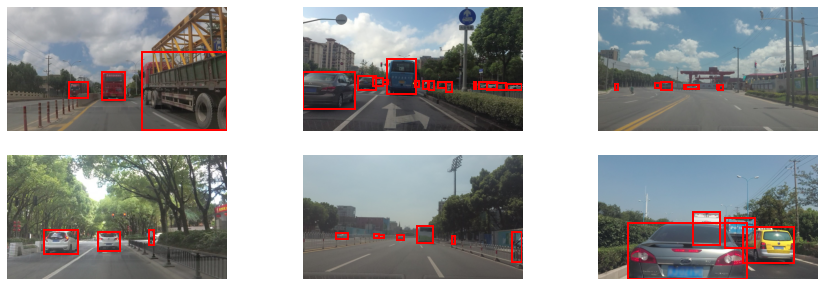

In [209]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
dataset_val = val_sets[0]
idxs = np.random.randint(0, len(dataset_val), 6)
for idx, ax in zip(idxs, axes.flatten()):
    visualize_image(idx, dataset_val, ax)
plt.show()

4820 total preds 6
4664 total preds 32
4875 total preds 98
4528 total preds 58
4803 total preds 51
4685 total preds 18


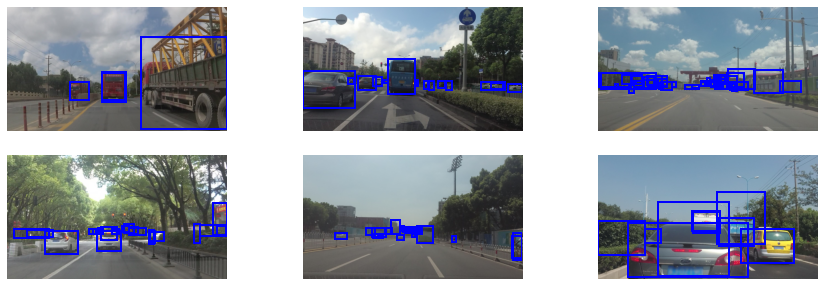

In [212]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))
for idx, ax in zip(idxs, axes.flatten()):
    img, target = dataset_val[idx]
    img = img.detach().numpy()
    img = np.moveaxis(img, 0, 2)
    ax.imshow(img)
    ax.axis('off')
    
    image_id = target['image_id'].item()
    preds = val_dict[image_id]
    print (image_id, "total preds", len(preds))
    for t in preds:
        bbox = t['bbox']
        if t['score'] > 0.3:
            ax.add_patch(Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                   fill=False, lw=2, edgecolor='b'))
    
plt.show()

## search for rarer classes

In [234]:
from tqdm import tqdm
label_stats = defaultdict(set)
image_id_labels = {}
ts = train_sets[0]
L = len(ts)
for i in tqdm(range(L)):
    target = ts._load_target(i)
    image_id = target['image_id'].item()
    image_id_labels[image_id] = target['labels'].tolist()
    for idx, b in enumerate(target['labels'].tolist()):
        label_stats[b].add(image_id)
        

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4470/4470 [00:17<00:00, 256.81it/s]


In [245]:
lowest = set()
for i in [1,2,6]:
    lowest = lowest.union(label_stats[i])
print("total 1,2,6 ids", len(lowest))

total 1,2,6 ids 3249


In [246]:
label_stats[6]

{11,
 18,
 39,
 60,
 68,
 96,
 116,
 122,
 138,
 158,
 210,
 219,
 223,
 238,
 263,
 270,
 286,
 289,
 295,
 316,
 339,
 355,
 372,
 410,
 417,
 439,
 453,
 469,
 511,
 534,
 537,
 540,
 545,
 566,
 600,
 604,
 621,
 682,
 686,
 692,
 735,
 738,
 744,
 754,
 798,
 800,
 815,
 830,
 833,
 835,
 846,
 860,
 892,
 894,
 900,
 908,
 976,
 979,
 1044,
 1121,
 1161,
 1169,
 1179,
 1207,
 1224,
 1261,
 1264,
 1269,
 1276,
 1322,
 1358,
 1373,
 1390,
 1444,
 1512,
 1528,
 1556,
 1570,
 1585,
 1627,
 1629,
 1648,
 1670,
 1702,
 1738,
 1744,
 1760,
 1796,
 1839,
 1854,
 1901,
 1942,
 1956,
 1974,
 2015,
 2028,
 2032,
 2094,
 2095,
 2099,
 2114,
 2118,
 2125,
 2138,
 2154,
 2171,
 2179,
 2223,
 2297,
 2300,
 2318,
 2319,
 2326,
 2330,
 2353,
 2359,
 2456,
 2474,
 2496,
 2506,
 2545,
 2562,
 2570,
 2587,
 2595,
 2623,
 2669,
 2691,
 2693,
 2698,
 2709,
 2728,
 2737,
 2740,
 2744,
 2785,
 2788,
 2815,
 2845,
 2851,
 2871,
 2885,
 2903,
 2930,
 2988,
 2994,
 3001,
 3077,
 3085,
 3172,
 3210,
 3249,


In [274]:
statss = {}
for image_id in lowest:
    n= { 1:0, 2:0 , 6:0}
    for k in image_id_labels[image_id]:
        if k in n:
            n[k] +=1
#     statss[image_id]  = n 
    statss[image_id]= sum(n.values())
            

In [276]:
dict(sorted(statss.items(), key=lambda item: -item[1]))

{3288: 26,
 3481: 24,
 4113: 23,
 2815: 21,
 3010: 21,
 1150: 20,
 2940: 20,
 3866: 20,
 4225: 19,
 66: 18,
 275: 18,
 3358: 18,
 3404: 18,
 1364: 17,
 1370: 17,
 343: 16,
 150: 15,
 1285: 15,
 473: 14,
 3141: 14,
 3421: 14,
 3789: 14,
 15: 13,
 446: 13,
 1142: 13,
 2641: 13,
 2789: 13,
 3114: 13,
 3326: 13,
 3818: 13,
 4437: 13,
 4485: 13,
 158: 12,
 214: 12,
 464: 12,
 490: 12,
 1554: 12,
 1575: 12,
 1744: 12,
 2148: 12,
 3038: 12,
 3542: 12,
 3861: 12,
 3889: 12,
 4175: 12,
 1: 11,
 91: 11,
 550: 11,
 611: 11,
 800: 11,
 807: 11,
 1372: 11,
 1567: 11,
 1759: 11,
 2005: 11,
 2042: 11,
 2073: 11,
 2310: 11,
 2777: 11,
 2972: 11,
 3089: 11,
 3146: 11,
 3229: 11,
 3301: 11,
 3316: 11,
 3632: 11,
 3736: 11,
 3783: 11,
 3995: 11,
 4078: 11,
 4305: 11,
 4494: 11,
 35: 10,
 119: 10,
 474: 10,
 507: 10,
 794: 10,
 968: 10,
 981: 10,
 989: 10,
 1165: 10,
 1197: 10,
 1234: 10,
 1239: 10,
 1267: 10,
 1328: 10,
 1442: 10,
 1525: 10,
 1765: 10,
 1832: 10,
 1873: 10,
 1914: 10,
 2156: 10,
 2496: 1